<u>
<h1>
    CNN improvisation for Cat and Dog problem
</h1>
</u>

In [1]:
import numpy as np

In [2]:
data = np.load("numpy-data/data.npy")
target = np.load("numpy-data/target.npy")

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout

In [324]:
from matplotlib import pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    data,
    target,
    test_size=0.2
)

In [7]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(19956, 50, 50, 1) (19956, 2)
(4990, 50, 50, 1) (4990, 2)


# Improvising approaches of CNN for a best model

## Approach: 1

In [26]:
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(50, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(5, 5)))
          
model.add(Flatten()) 
model.add(Dense(500, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))
          
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 100)       1000      
_________________________________________________________________
activation_15 (Activation)   (None, 48, 48, 100)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 100)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 50)        45050     
_________________________________________________________________
activation_16 (Activation)   (None, 22, 22, 50)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)              

In [28]:
history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
624/624 [==============================] - 123s 190ms/step - loss: 0.6870 - accuracy: 0.5313 - val_loss: 0.6302 - val_accuracy: 0.6471
Epoch 2/10
624/624 [==============================] - 117s 188ms/step - loss: 0.5730 - accuracy: 0.7028 - val_loss: 0.5042 - val_accuracy: 0.7617
Epoch 3/10
624/624 [==============================] - 116s 187ms/step - loss: 0.4911 - accuracy: 0.7639 - val_loss: 0.4710 - val_accuracy: 0.7790
Epoch 4/10
624/624 [==============================] - 118s 189ms/step - loss: 0.4532 - accuracy: 0.7845 - val_loss: 0.4700 - val_accuracy: 0.7747
Epoch 5/10
624/624 [==============================] - 117s 187ms/step - loss: 0.4211 - accuracy: 0.8000 - val_loss: 0.4475 - val_accuracy: 0.7972
Epoch 6/10
624/624 [==============================] - 117s 187ms/step - loss: 0.3834 - accuracy: 0.8243 - val_loss: 0.4440 - val_accuracy: 0.8044
Epoch 7/10
624/624 [==============================] - 118s 189ms/step - loss: 0.3590 - accuracy: 0.8346 - val_loss: 0.4339 -

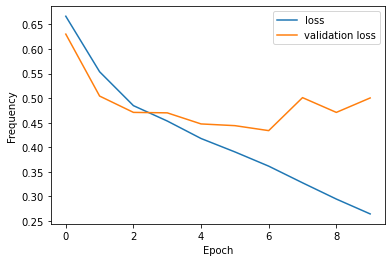

In [33]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

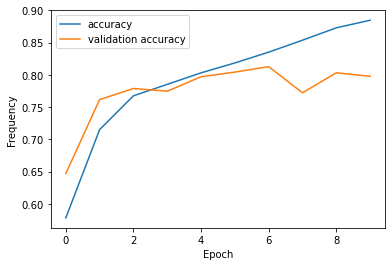

In [34]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<h2>Conclusions</h2>

<ol>
    <li>During the training of 2<sup>nd</sup> epoch, data overfit has started</li>
    <li>Validation accuracy has gradually decreased</li>
    <li>Both of val_loss and val_accuracy levels may be grow with more fluctuations in future epochs</li>
    <li>Loss and accuracy can be decrease and increase respectively in future trainings</li>
</ol>

<h2>Suggestions</h2>

<ul>
    <li>To overcome overfitting it is able to add dropout layers between hidden layers of classification layers</li>
    <li>Adding augmentation features to feature extraction layers as solution for overfitting</li>
    <li>Adding batch normalization and weight initializing methods for convolution layers will be possible to overcome overffiting and will improve overall network</li>
    <li>Changing the network architecture</li>
</ul>

<hr>

<h2>Approach: 2 (Adding dropout layers)</h2

In [36]:
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(50, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(5, 5)))
          
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5)) 
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))
          
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 100)       1000      
_________________________________________________________________
activation_19 (Activation)   (None, 48, 48, 100)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 100)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 50)        45050     
_________________________________________________________________
activation_20 (Activation)   (None, 22, 22, 50)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)             

In [38]:
history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
624/624 [==============================] - 128s 186ms/step - loss: 0.6895 - accuracy: 0.5261 - val_loss: 0.6302 - val_accuracy: 0.6385
Epoch 2/10
624/624 [==============================] - 122s 195ms/step - loss: 0.5971 - accuracy: 0.6817 - val_loss: 0.4963 - val_accuracy: 0.7611
Epoch 3/10
624/624 [==============================] - 119s 190ms/step - loss: 0.5180 - accuracy: 0.7445 - val_loss: 0.4746 - val_accuracy: 0.7792
Epoch 4/10
624/624 [==============================] - 120s 193ms/step - loss: 0.4767 - accuracy: 0.7749 - val_loss: 0.4446 - val_accuracy: 0.7910
Epoch 5/10
624/624 [==============================] - 117s 188ms/step - loss: 0.4493 - accuracy: 0.7932 - val_loss: 0.4479 - val_accuracy: 0.7888
Epoch 6/10
624/624 [==============================] - 118s 190ms/step - loss: 0.4351 - accuracy: 0.7988 - val_loss: 0.4435 - val_accuracy: 0.7900
Epoch 7/10
624/624 [==============================] - 118s 189ms/step - loss: 0.4151 - accuracy: 0.8109 - val_loss: 0.4208 -

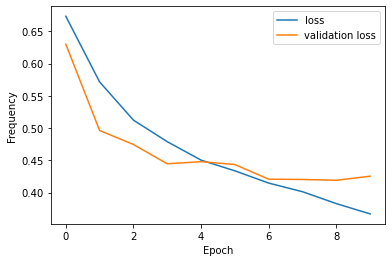

In [39]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

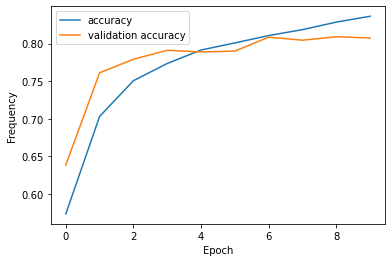

In [40]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<h2>Conclusions</h2>

<ol>
    <li>Comparing to the previous session ovefitting has minimized. But after the 5<sup>th</sup> epoch overfit has started again (adding dropout layers made some optimization)</li>
    <li>Validation accuracy has decreased compare to the accuracy level</li>
    <li>Loss and accuracy can be decrease and increase respectively in future trainings</li>
</ol>

<h2>Suggestions</h2>

<ul>
    <li>Adding augmentation features to feature extraction layers as solution for overfitting</li>
    <li>Adding batch normalization and weight initializing methods for convolution layers will be possible to overcome overffiting and will improve overall network</li>
    <li>Changing the network architecture</li>
</ul>

<h2>Approach: 3 (Applying data augmentation + Weight initialization + Changing the NN architecture)</h2

In [15]:
model = Sequential()

model.add(Conv2D(
       50, 
       (3, 3), 
       input_shape=data.shape[1:], 
       padding="same", 
       kernel_initializer="orthogonal"
    )
)
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3), padding="same", kernel_initializer="orthogonal"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(5, 5)))
          
model.add(Flatten())
model.add(Dense(750, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5)) 
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))
          
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 50)        500       
_________________________________________________________________
activation_4 (Activation)    (None, 50, 50, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 100)       45100     
_________________________________________________________________
activation_5 (Activation)    (None, 25, 25, 100)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2500)             

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
img_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    shear_range=0.15,
    zoom_range=0.2,
    fill_mode="wrap",
)

In [18]:
train_batch_size = 20
validation_batch_size = 32

history = model.fit(
    img_generator.flow(train_data, train_labels, shuffle=True, batch_size=train_batch_size),
    validation_data=(test_data, test_labels),
    epochs=150,
    validation_steps=len(test_data) // validation_batch_size,
    validation_batch_size=validation_batch_size
)

Epoch 1/150
998/998 [==============================] - 120s 118ms/step - loss: 0.6969 - accuracy: 0.5280 - val_loss: 0.6804 - val_accuracy: 0.5738
Epoch 2/150
998/998 [==============================] - 121s 121ms/step - loss: 0.6828 - accuracy: 0.5570 - val_loss: 0.6655 - val_accuracy: 0.5950
Epoch 3/150
998/998 [==============================] - 118s 118ms/step - loss: 0.6804 - accuracy: 0.5696 - val_loss: 0.6486 - val_accuracy: 0.6224
Epoch 4/150
998/998 [==============================] - 119s 119ms/step - loss: 0.6702 - accuracy: 0.5935 - val_loss: 0.6421 - val_accuracy: 0.6331
Epoch 5/150
998/998 [==============================] - 120s 120ms/step - loss: 0.6642 - accuracy: 0.6051 - val_loss: 0.6298 - val_accuracy: 0.6504
Epoch 6/150
998/998 [==============================] - 119s 119ms/step - loss: 0.6530 - accuracy: 0.6161 - val_loss: 0.6085 - val_accuracy: 0.6591
Epoch 7/150
998/998 [==============================] - 116s 117ms/step - loss: 0.6481 - accuracy: 0.6277 - val_loss: 0

998/998 [==============================] - 115s 115ms/step - loss: 0.5250 - accuracy: 0.7394 - val_loss: 0.4558 - val_accuracy: 0.7877
Epoch 112/150
998/998 [==============================] - 115s 115ms/step - loss: 0.5314 - accuracy: 0.7390 - val_loss: 0.5270 - val_accuracy: 0.7349
Epoch 113/150
998/998 [==============================] - 114s 115ms/step - loss: 0.5300 - accuracy: 0.7325 - val_loss: 0.4717 - val_accuracy: 0.7784
Epoch 114/150
998/998 [==============================] - 115s 115ms/step - loss: 0.5248 - accuracy: 0.7418 - val_loss: 0.4500 - val_accuracy: 0.7871
Epoch 115/150
998/998 [==============================] - 115s 115ms/step - loss: 0.5137 - accuracy: 0.7457 - val_loss: 0.4662 - val_accuracy: 0.7750
Epoch 116/150
998/998 [==============================] - 144s 144ms/step - loss: 0.5256 - accuracy: 0.7437 - val_loss: 0.4535 - val_accuracy: 0.7881
Epoch 117/150
998/998 [==============================] - 128s 128ms/step - loss: 0.5209 - accuracy: 0.7411 - val_loss: 0

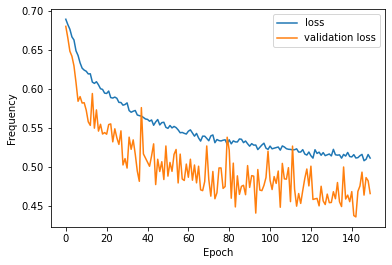

In [21]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

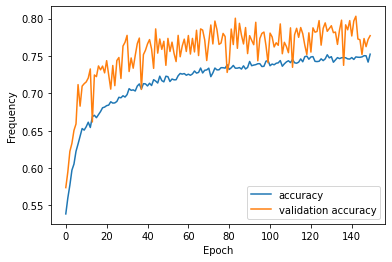

In [22]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<h2>Conclusions</h2>

<ol>
    <li>Overfitting has minimized gradually.</li>
    <li>The formation of validation loss and accuray is not much smooth. (Has grew with more fluctuations)</li>
    <li>Loss and accuracy will be decrease and increase respectively in future trainings </li>
</ol>

<h2>Suggestions</h2>

<ul>
    <li>Adding batch normalization for convolution layers will be possible to overcome overffiting</li>
    <li>Changing the network architecture by various optimizers, loss functions, activations and other relavant parameters</li>
</ul>

<h2>Approach: 4 (Changing the architecture)</h2

In [14]:
from keras.callbacks import ModelCheckpoint

In [5]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=data.shape[1:], padding="same", kernel_initializer="orthogonal"))
model.add(Activation("relu"))

model.add(Conv2D(16, (3, 3), kernel_initializer="orthogonal", padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(32, (3, 3), kernel_initializer="orthogonal", padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(7, 7)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(2, activation="softmax"))
          
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 50, 50, 16)        160       
_________________________________________________________________
activation_15 (Activation)   (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
activation_16 (Activation)   (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
activation_17 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)         

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_img_generator = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     samplewise_center=True,
#     samplewise_std_normalization=True,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode="wrap",
)

# test_img_generator = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     samplewise_center=True,
#     samplewise_std_normalization=True,
# )

In [39]:
train_img_generator.fit(train_data)

In [40]:
val_loss_checkpoint_callback = ModelCheckpoint(
    filepath="best_val_loss_models/val_loss_model.{epoch:03d}-{loss:.4f}-{val_loss:.4f}.h5",
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True
)

val_acc_checkpoint_callback = ModelCheckpoint(
    filepath="best_loss_models/loss_model.{epoch:03d}-{loss:.4f}-{val_loss:.4f}.h5",
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True
)

In [41]:
train_batch_size = 20
validation_batch_size = 10

history = model.fit(
    train_img_generator.flow(train_data, train_labels, shuffle=True, batch_size=train_batch_size),
    validation_data=(test_data, test_labels),
    epochs=100,
    steps_per_epoch=len(train_data) // train_batch_size,
    callbacks=[val_loss_checkpoint_callback, val_acc_checkpoint_callback]
)

Epoch 1/100
997/997 [==============================] - 97s 96ms/step - loss: 0.6608 - accuracy: 0.6012 - val_loss: 0.5802 - val_accuracy: 0.7148
Epoch 2/100
997/997 [==============================] - 100s 100ms/step - loss: 0.6009 - accuracy: 0.6795 - val_loss: 0.5112 - val_accuracy: 0.7493
Epoch 3/100
997/997 [==============================] - 100s 101ms/step - loss: 0.5655 - accuracy: 0.7053 - val_loss: 0.4952 - val_accuracy: 0.7577
Epoch 4/100
997/997 [==============================] - 101s 101ms/step - loss: 0.5559 - accuracy: 0.7149 - val_loss: 0.5273 - val_accuracy: 0.7435
Epoch 5/100
997/997 [==============================] - 101s 101ms/step - loss: 0.5358 - accuracy: 0.7285 - val_loss: 0.5116 - val_accuracy: 0.7433
Epoch 6/100
997/997 [==============================] - 101s 101ms/step - loss: 0.5192 - accuracy: 0.7409 - val_loss: 0.4666 - val_accuracy: 0.7808
Epoch 7/100
997/997 [==============================] - 101s 102ms/step - loss: 0.5073 - accuracy: 0.7487 - val_loss: 0.4

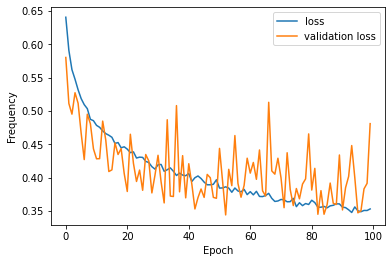

In [42]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

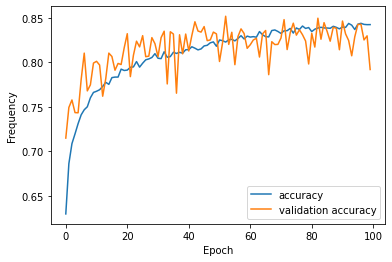

In [43]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

In [159]:
model.load_weights("models/best_val_loss_models/val_loss_model.053-0.3862-0.3440.h5")

In [161]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

156/156 [==============================] - 4s 26ms/step - loss: 0.3440 - accuracy: 0.8519
0.34403297305107117 0.8519037961959839


In [162]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)

In [163]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2081  396]
 [ 343 2170]]


In [169]:
print("Prediction accuracy for class Dog: ", (confusion[0][0] / np.sum(confusion[0])) * 100)
print("Prediction accuracy for class Cat: ", (confusion[1][1] / np.sum(confusion[1])) * 100)
print("Overall accuracy: ", ((confusion[0][0] + confusion[1][1]) / (np.sum(confusion))) * 100)

Prediction accuracy for class Dog:  84.01291885345175
Prediction accuracy for class Cat:  86.35097493036211
Overall accuracy:  85.19038076152304


<u><h3>Attempts of development</h3></u>
<h3>1.</h3>

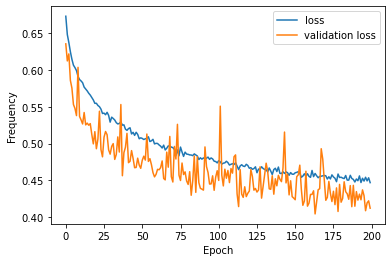

In [43]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

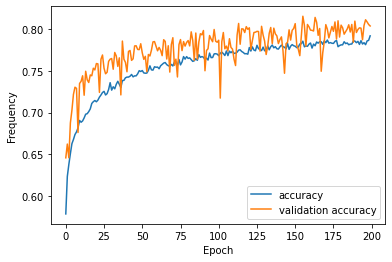

In [44]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>

<h3>2.</h3>

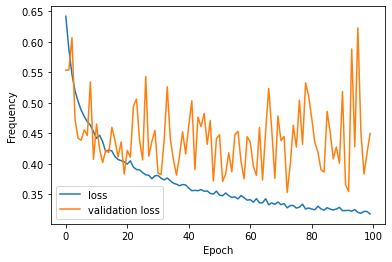

In [149]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

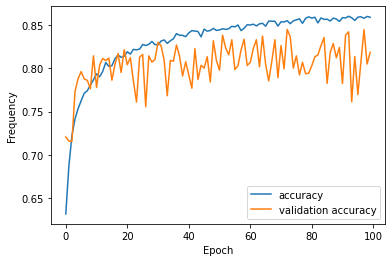

In [150]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>3.</h3>

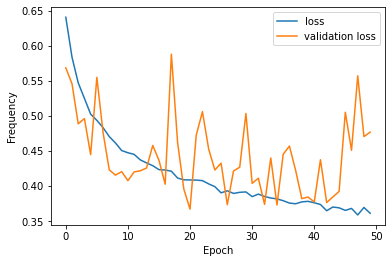

In [41]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

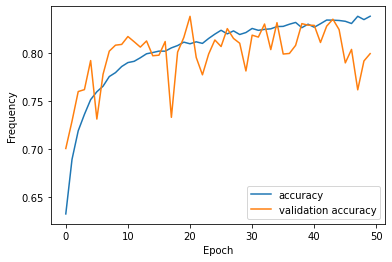

In [42]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>4.</h3>

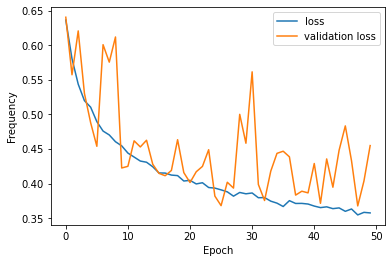

In [107]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

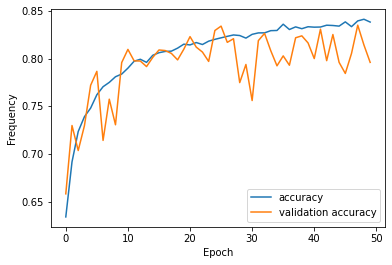

In [108]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>5.</h3>

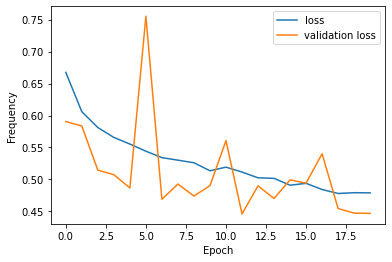

In [61]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

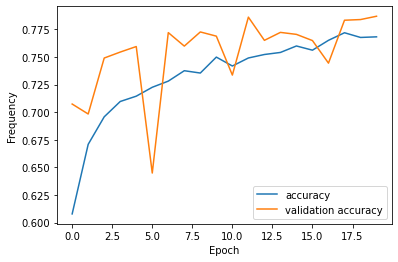

In [62]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>6.</h3>

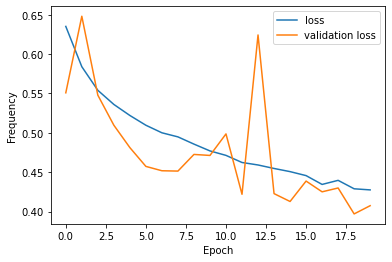

In [72]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

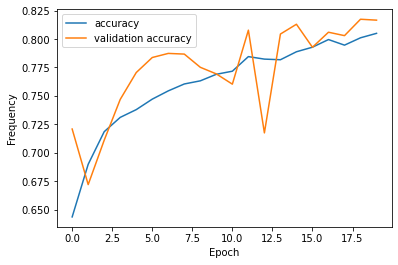

In [73]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>7.</h3>

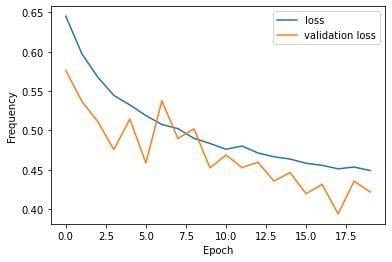

In [79]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

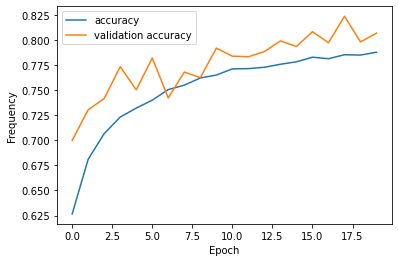

In [80]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>8.</h3>

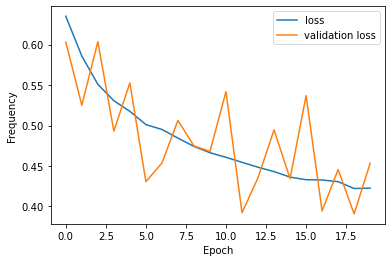

In [100]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

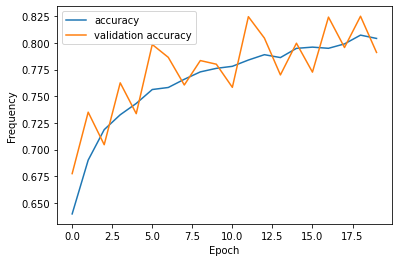

In [101]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>9.</h3>

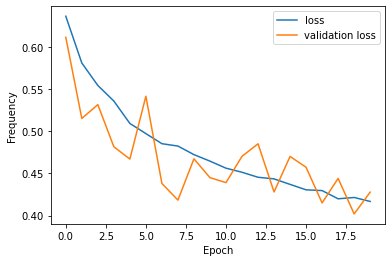

In [93]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

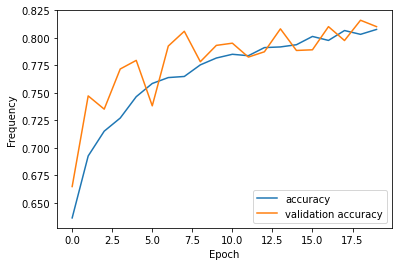

In [94]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>10.</h3>

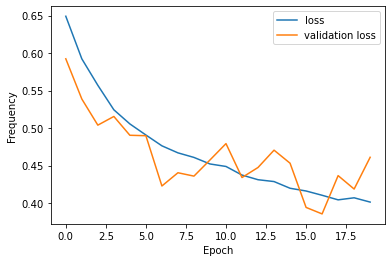

In [132]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

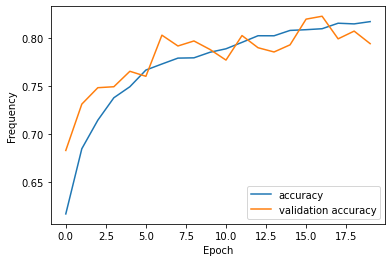

In [133]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legen d()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<h2>Conclusions</h2>

<ol>
    <li>The formation of validation loss and accuray is not much smooth. (Has grew with more fluctuations)</li>
    <li>Loss and accuracy will be decrease and increase respectively in future trainings </li>
</ol>

<h2>Suggestions</h2>

<ul>
    <li>Changing the network architecture by various optimizers, loss functions, activations and other relavant parameters</li>
    <li>Changing the train/test data and input dimensions</li>
</ul>

<h3>Approach: 5 (Training the model such that generating validation data using image generator)</h3>

In [5]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=data.shape[1:], padding="same", kernel_initializer="orthogonal"))
model.add(Activation("relu"))

model.add(Conv2D(16, (3, 3), kernel_initializer="orthogonal", padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(32, (3, 3), kernel_initializer="orthogonal", padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(7, 7)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(2, activation="softmax"))
          
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0

In [130]:
val_loss_checkpoint_callback = ModelCheckpoint(
    filepath="best_val_loss_models/val_loss_model.{epoch:03d}-{loss:.4f}-{val_loss:.4f}.h5",
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True
)

val_acc_checkpoint_callback = ModelCheckpoint(
    filepath="best_loss_models/loss_model.{epoch:03d}-{loss:.4f}-{val_loss:.4f}.h5",
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True
)

In [131]:
from keras.preprocessing.image import ImageDataGenerator

train_test_img_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode="nearest",
)

In [132]:
train_test_img_generator.fit(train_data)
train_test_img_generator.fit(test_data)

In [133]:
train_batch_size = 20
validation_batch_size = 10

history = model.fit(
    train_test_img_generator.flow(train_data, train_labels, shuffle=True, batch_size=train_batch_size),
    validation_data=train_test_img_generator.flow(test_data, test_labels),
    epochs=100,
    steps_per_epoch=len(train_data) // train_batch_size,
    callbacks=[val_loss_checkpoint_callback, val_acc_checkpoint_callback]
)

Epoch 1/100
997/997 [==============================] - 93s 91ms/step - loss: 0.6695 - accuracy: 0.5844 - val_loss: 0.5816 - val_accuracy: 0.6884
Epoch 2/100
997/997 [==============================] - 93s 93ms/step - loss: 0.5863 - accuracy: 0.6829 - val_loss: 0.5515 - val_accuracy: 0.7273
Epoch 3/100
997/997 [==============================] - 94s 94ms/step - loss: 0.5519 - accuracy: 0.7142 - val_loss: 0.5231 - val_accuracy: 0.7389
Epoch 4/100
997/997 [==============================] - 93s 94ms/step - loss: 0.5322 - accuracy: 0.7332 - val_loss: 0.5064 - val_accuracy: 0.7519
Epoch 5/100
997/997 [==============================] - 93s 94ms/step - loss: 0.5047 - accuracy: 0.7555 - val_loss: 0.5101 - val_accuracy: 0.7479
Epoch 6/100
997/997 [==============================] - 98s 98ms/step - loss: 0.4999 - accuracy: 0.7574 - val_loss: 0.4705 - val_accuracy: 0.7782
Epoch 7/100
997/997 [==============================] - 94s 94ms/step - loss: 0.4781 - accuracy: 0.7691 - val_loss: 0.4526 - val_ac

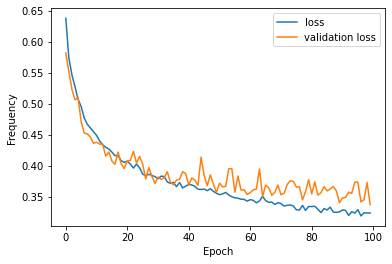

In [134]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

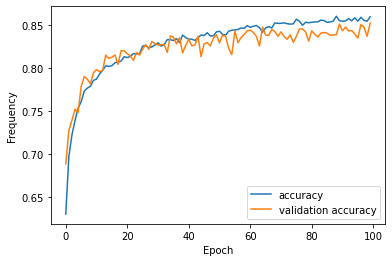

In [135]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

<hr>
<h3>Evaluating the model trained at approach: 4</h3>

In [10]:
model.load_weights("best_val_loss_models/val_loss_model.100-0.3238-0.3375.h5")

In [177]:
loss, acc = model.evaluate(train_test_img_generator.flow(test_data, test_labels))
print(loss, acc)

156/156 [==============================] - 5s 33ms/step - loss: 0.3352 - accuracy: 0.8561
0.3351699113845825 0.8561122417449951


In [184]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)

In [185]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[1806  671]
 [  89 2424]]


In [175]:
print("Prediction accuracy for class Dog: ", (confusion[0][0] / np.sum(confusion[0])) * 100)
print("Prediction accuracy for class Cat: ", (confusion[1][1] / np.sum(confusion[1])) * 100)
print("Overall accuracy: ", ((confusion[0][0] + confusion[1][1]) / (np.sum(confusion))) * 100)

Prediction accuracy for class Dog:  72.91077916834881
Prediction accuracy for class Cat:  96.458416235575
Overall accuracy:  84.76953907815631


In [6]:
import cv2
import os

In [18]:
test_img_root = "test"
img_files = os.listdir(test_img_root)
labels = {0: "Cat", 1: "Dog"}

In [19]:
images = []
orig_images = []

for img_file in img_files:
    img_path = os.path.join(test_img_root, img_file)
    orig_image = cv2.imread(img_path)
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (50, 50))
    
    orig_images.append(cv2.resize(orig_image, (100, 100)))
    images.append(image)
    
images = np.asarray(images)
orig_images = np.asarray(orig_images)

In [21]:
predictions = []

for image in images:
    image = image / 255
    image = np.reshape(image, (1, 50, 50, 1))
    prediction = model.predict(image)
    arg_max = np.argmax(prediction, axis=1)[0]
    label = labels[arg_max]
    predictions.append((label, prediction[0][arg_max]))

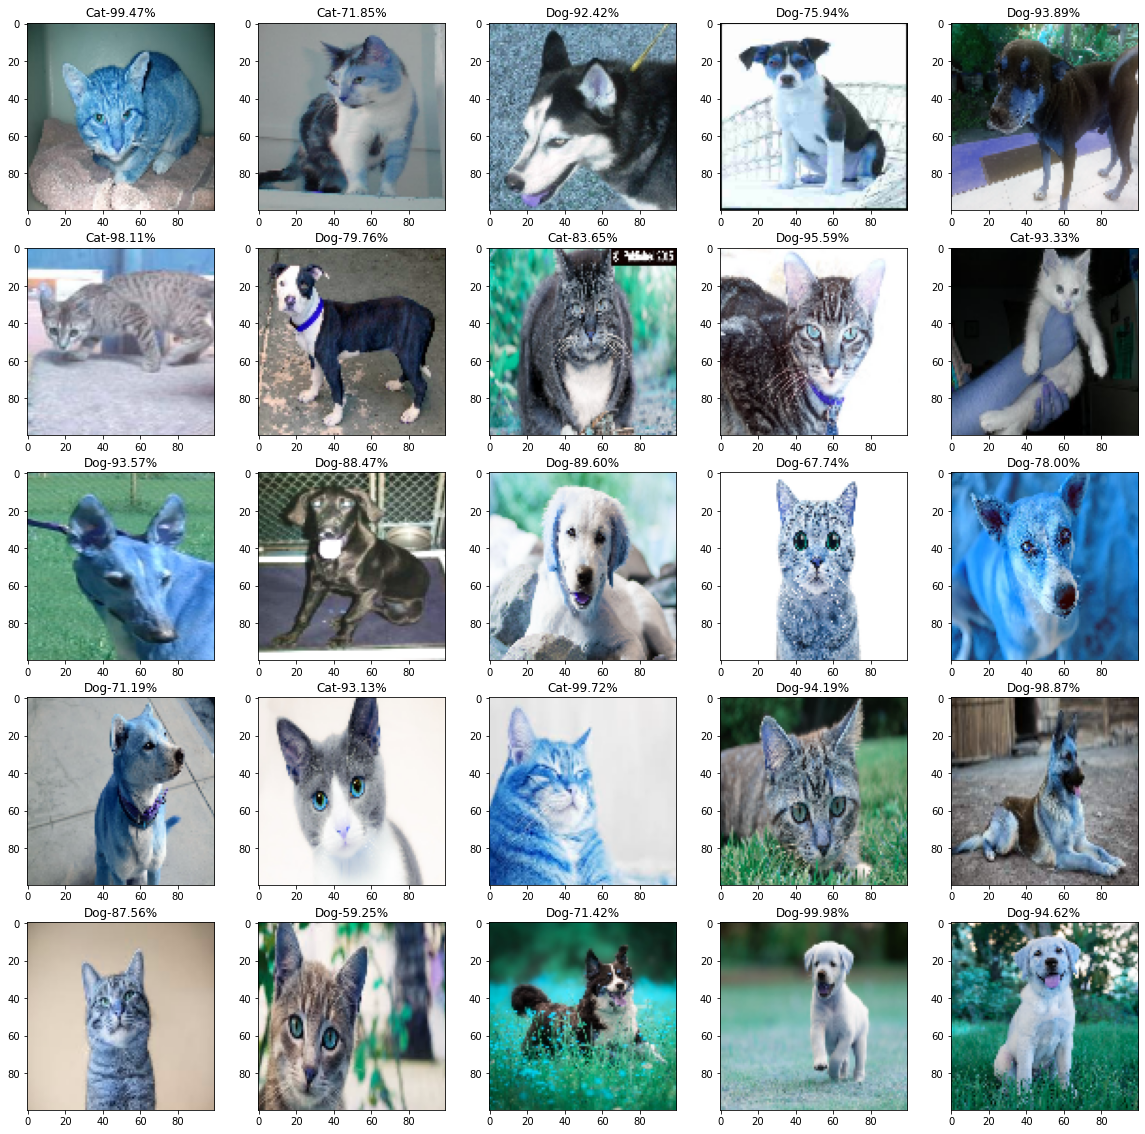

In [23]:
figure = plt.figure(figsize=(20, 20))
cols = 5
rows = 5

for i in range(cols * rows):
    image = orig_images[i]
    figure.add_subplot(rows, cols, i + 1)
    plt.title(predictions[i][0] + "-" + "{0:.2f}%".format(predictions[i][1] * 100))
    plt.imshow(image)
plt.show()

<hr>

<h2>Conclusions</h2>

<ol>
    <li>Cannot satisfy about the model cause it has trained with more fluctuations though it gives the best results</li> 
    <li>Loss and accuracy will be decrease and increase respectively in future trainings </li>
</ol>

<h2>Suggestions</h2>

<ul>
    <li>Adding dropout layers between convolution layers will be possible to overcome overffiting</li>
    <li>Changing the network architecture by various optimizers, loss functions, activations and other relavant parameters</li>
</ul>

<h2>Approach: 6 (Adding dropout layers between convolution layers)</h2>

In [68]:
from keras.callbacks import ModelCheckpoint

In [287]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=data.shape[1:], padding="same", kernel_initializer="orthogonal"))
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), kernel_initializer="orthogonal", padding="same"))
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), kernel_initializer="orthogonal", padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(7, 7)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(2, activation="softmax"))
          
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [193]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 50, 50, 16)        160       
_________________________________________________________________
activation_84 (Activation)   (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
activation_85 (Activation)   (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 50, 50, 32)      

In [80]:
val_loss_checkpoint_callback = ModelCheckpoint(
    filepath="best_val_loss_models/val_loss_model.{epoch:03d}-{loss:.4f}-{val_loss:.4f}.h5",
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True
)

val_acc_checkpoint_callback = ModelCheckpoint(
    filepath="best_loss_models/loss_model.{epoch:03d}-{loss:.4f}-{val_loss:.4f}.h5",
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True
)

In [81]:
from keras.preprocessing.image import ImageDataGenerator

train_test_img_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode="wrap",
)

In [82]:
train_test_img_generator.fit(train_data)

In [83]:
train_batch_size = 20
validation_batch_size = 10

history = model.fit(
    train_test_img_generator.flow(train_data, train_labels, shuffle=True, batch_size=train_batch_size),
    validation_data=(test_data, test_labels),
    epochs=100,
    steps_per_epoch=len(train_data) // train_batch_size,
    callbacks=[val_loss_checkpoint_callback, val_acc_checkpoint_callback]
)

Epoch 1/100
997/997 [==============================] - 115s 113ms/step - loss: 0.6804 - accuracy: 0.5720 - val_loss: 0.6175 - val_accuracy: 0.6615
Epoch 2/100
997/997 [==============================] - 114s 115ms/step - loss: 0.6262 - accuracy: 0.6537 - val_loss: 0.6146 - val_accuracy: 0.6553
Epoch 3/100
997/997 [==============================] - 113s 113ms/step - loss: 0.6034 - accuracy: 0.6730 - val_loss: 0.5555 - val_accuracy: 0.7138
Epoch 4/100
997/997 [==============================] - 113s 114ms/step - loss: 0.5855 - accuracy: 0.6904 - val_loss: 0.5837 - val_accuracy: 0.6846
Epoch 5/100
997/997 [==============================] - 113s 114ms/step - loss: 0.5781 - accuracy: 0.6961 - val_loss: 0.5724 - val_accuracy: 0.7074
Epoch 6/100
997/997 [==============================] - 114s 114ms/step - loss: 0.5675 - accuracy: 0.7057 - val_loss: 0.5086 - val_accuracy: 0.7485
Epoch 7/100
997/997 [==============================] - 114s 114ms/step - loss: 0.5598 - accuracy: 0.7062 - val_loss: 0

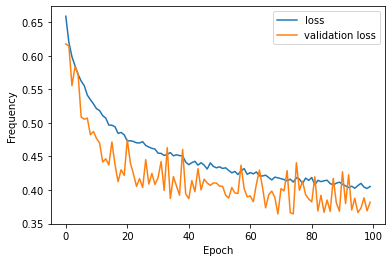

In [84]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

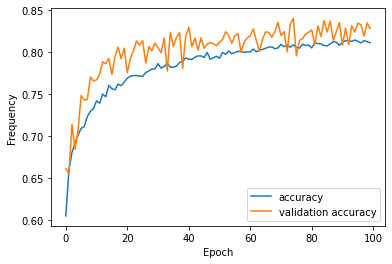

In [85]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.show()

In [288]:
model.load_weights("best_val_loss_models/val_loss_model.070-0.4181-0.3643.h5")

In [289]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

156/156 [==============================] - 30s 29ms/step - loss: 0.3701 - accuracy: 0.8326
0.36429449915885925 0.8356713652610779


In [290]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)

In [299]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2158  359]
 [ 461 2012]]


In [297]:
import seaborn as sn
import pandas as pd

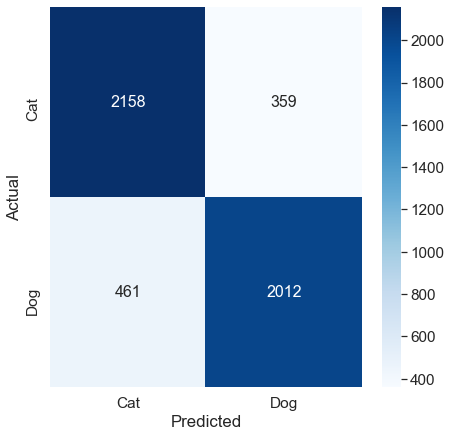

In [316]:
df_cm = pd.DataFrame(confusion, columns=np.unique(["Cat", "Dog"]), index = np.unique(["Cat", "Dog"]))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt="d")# for font size

In [303]:
df_cm

Predicted   Cat   Dog
Actual               
Cat        2158   359
Dog         461  2012

In [317]:
print("Prediction accuracy for class Dog: ", (confusion[0][0] / np.sum(confusion[0])) * 100)
print("Prediction accuracy for class Cat: ", (confusion[1][1] / np.sum(confusion[1])) * 100)
print("Overall accuracy: ", ((confusion[0][0] + confusion[1][1]) / (np.sum(confusion))) * 100)

Prediction accuracy for class Dog:  85.73698847834724
Prediction accuracy for class Cat:  81.35867367569753
Overall accuracy:  83.56713426853707


In [93]:
import cv2
import os

In [318]:
test_img_root = "test"
img_files = os.listdir(test_img_root)
labels = {0: "Cat", 1: "Dog"}

In [319]:
images = []
orig_images = []

for img_file in img_files:
    img_path = os.path.join(test_img_root, img_file)
    orig_image = cv2.imread(img_path)
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (50, 50))
    
    orig_images.append(cv2.resize(orig_image, (100, 100)))
    images.append(image)
    
images = np.asarray(images)
orig_images = np.asarray(orig_images)

In [320]:
predictions = []

for image in images:
    image = image / 255
    image = np.reshape(image, (1, 50, 50, 1))
    prediction = model.predict(image)
    arg_max = np.argmax(prediction, axis=1)[0]
    label = labels[arg_max]
    predictions.append((label, prediction[0][arg_max]))

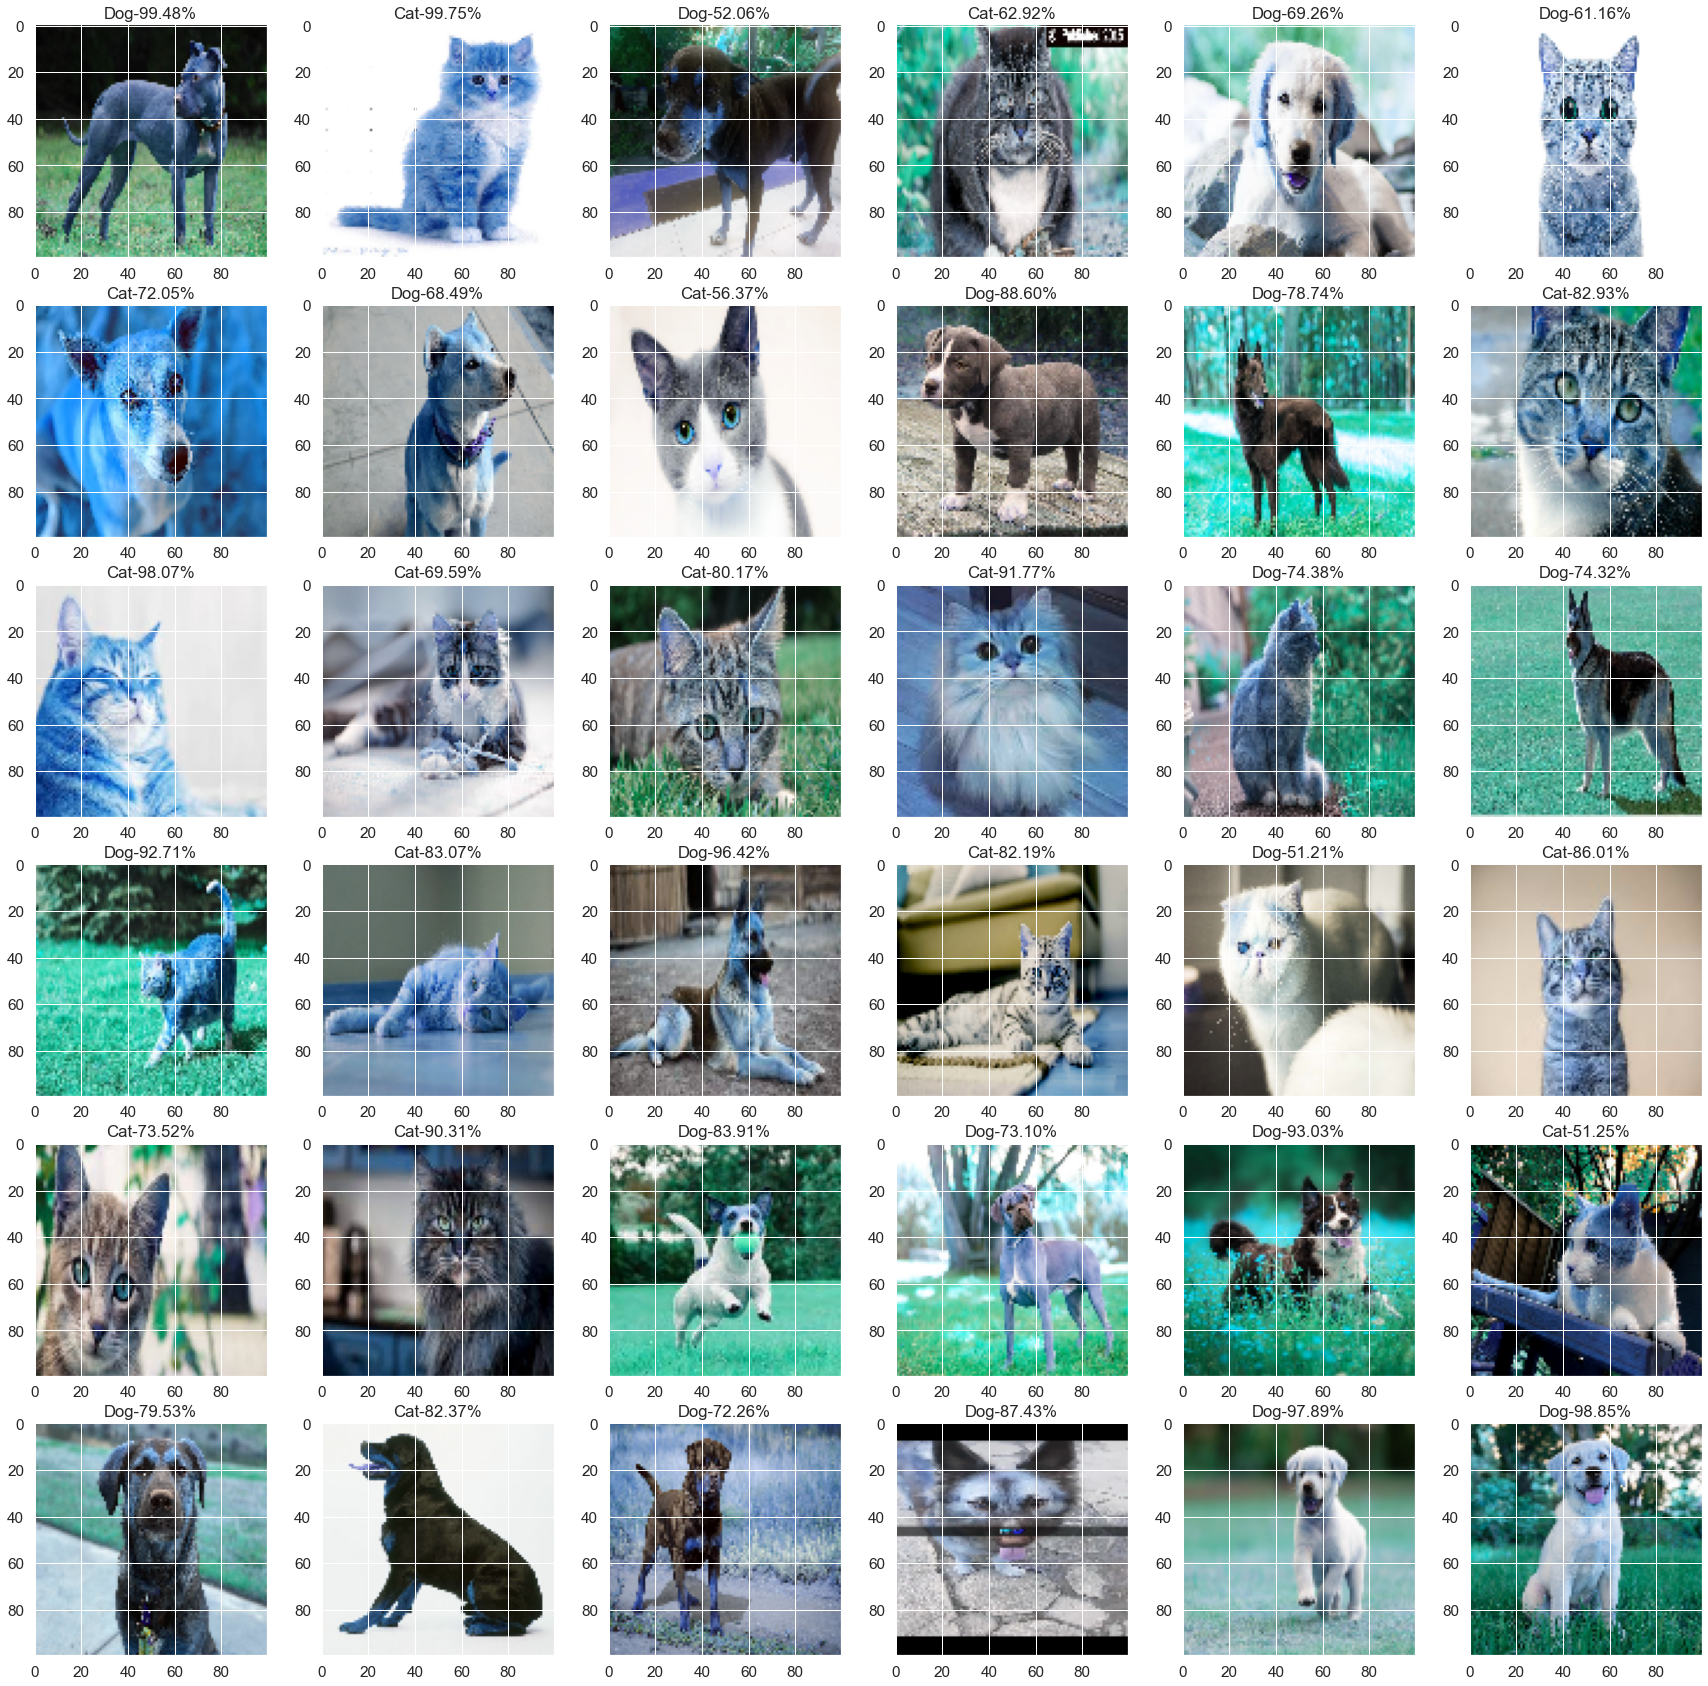

In [327]:
figure = plt.figure(figsize=(30, 30))
cols = 6
rows = 6

for i in range(cols * rows):
    image = orig_images[i]
    figure.add_subplot(rows, cols, i + 1)
    plt.title(predictions[i][0] + "-" + "{0:.2f}%".format(predictions[i][1] * 100))
    plt.imshow(image)
plt.show()

<h2>Conclusions</h2>

<ol>
    <li>Can satisfy about the overall model cause it gives good results and less fluctuation during the training phase</li> 
    <li>Loss and accuracy will be decrease and increase respectively in future trainings </li>
</ol>

<h2>Suggestions</h2>

<ul>
    <li>Training the model with more epochs to get better results</li>
</ul>

<hr>
<p><b>Done by: </b>B.K.Sineth Sankalpa</p>